In [4]:
save_file_number = 800
output_folder = f"/Users/Jayee/Library/CloudStorage/\
OneDrive-UW-Madison/PhD(my_PC)/PhD(output_files)/\
Engineering_projects/Shear_loading/240709_vmstress_comp_hist/\
240709_plot_histograms/histograms_{save_file_number}/scaled_wrt_max_value"

# Histograms for the obtained data.
- We have a .npy file with each column representing a different time instance having 8 million data points of VonMises stress. We are interested in constructing a histogram and see its evolutionfor these von mises stresses.

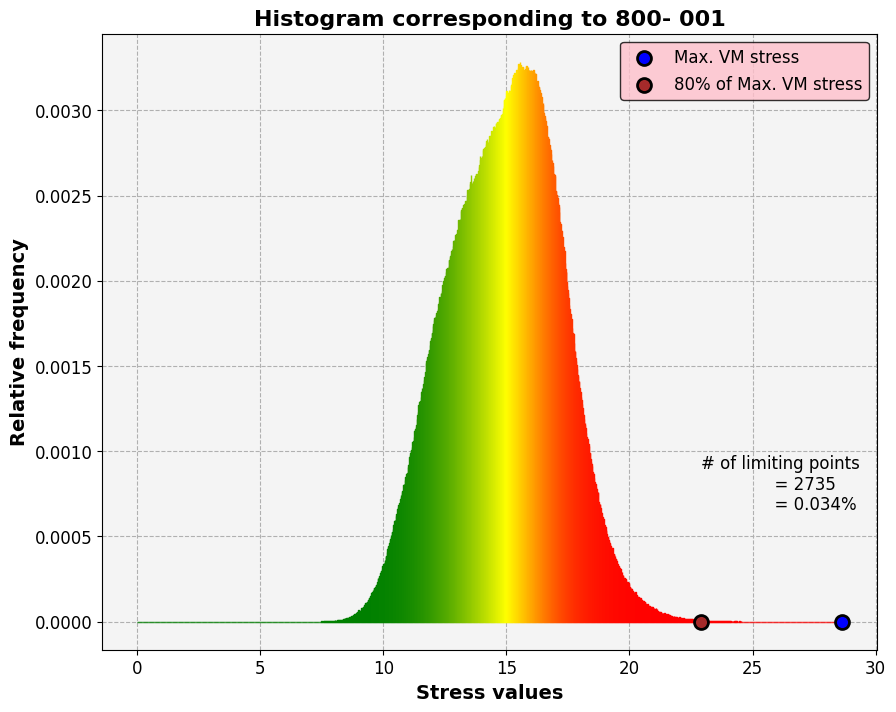

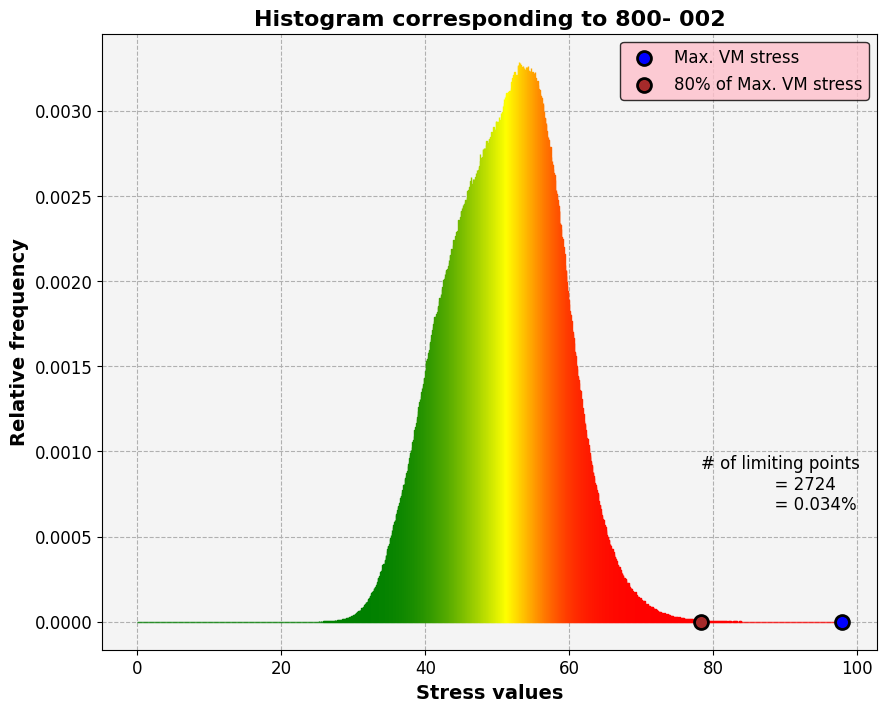

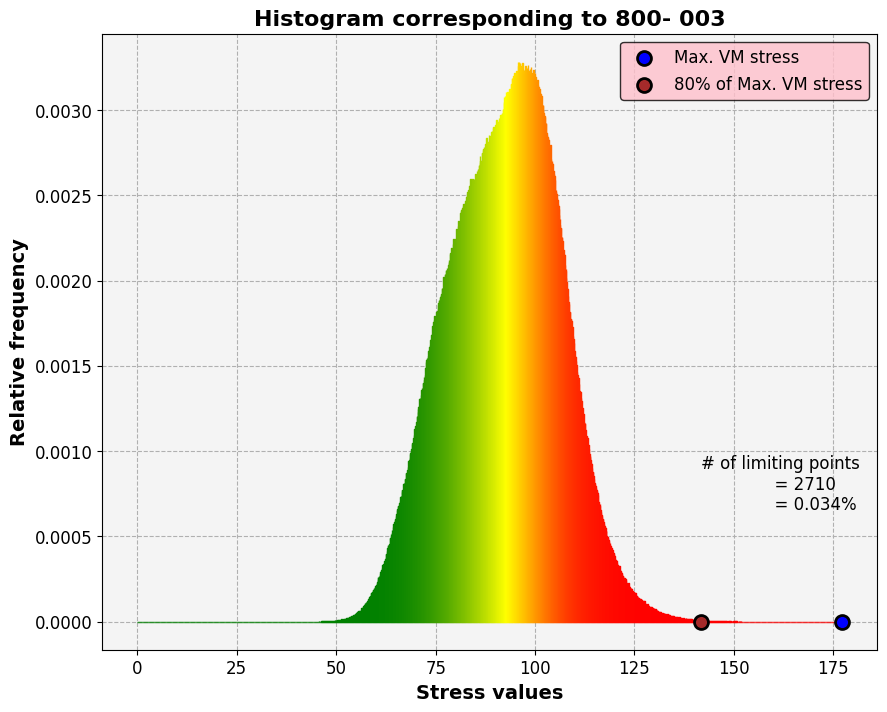

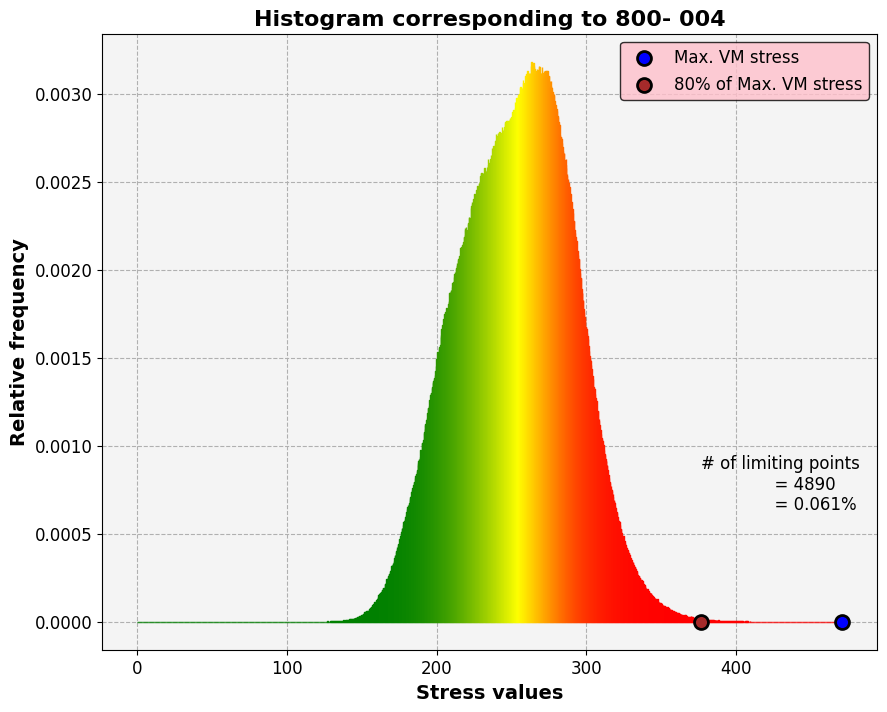

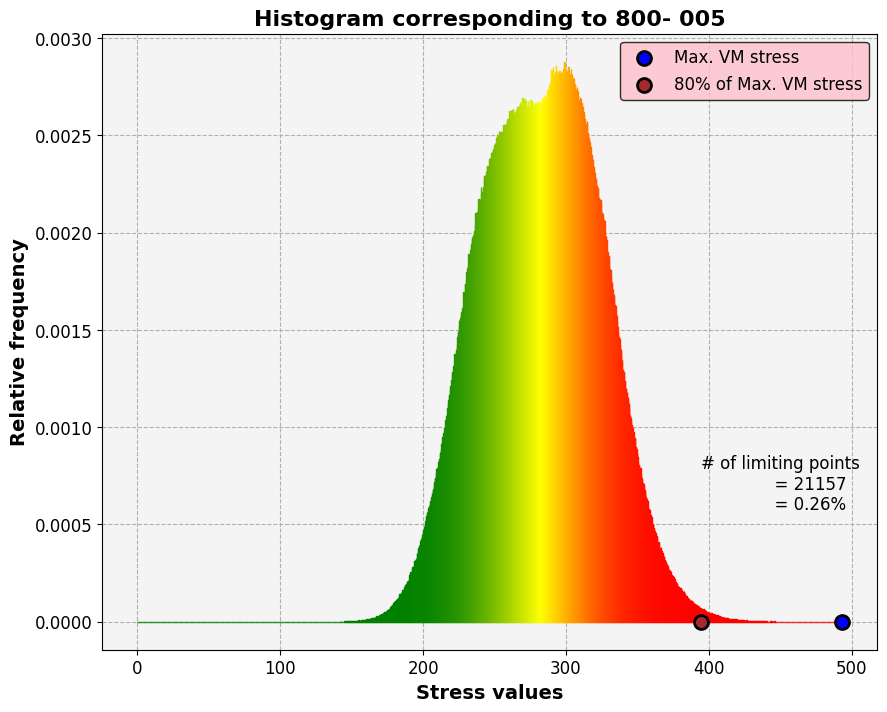

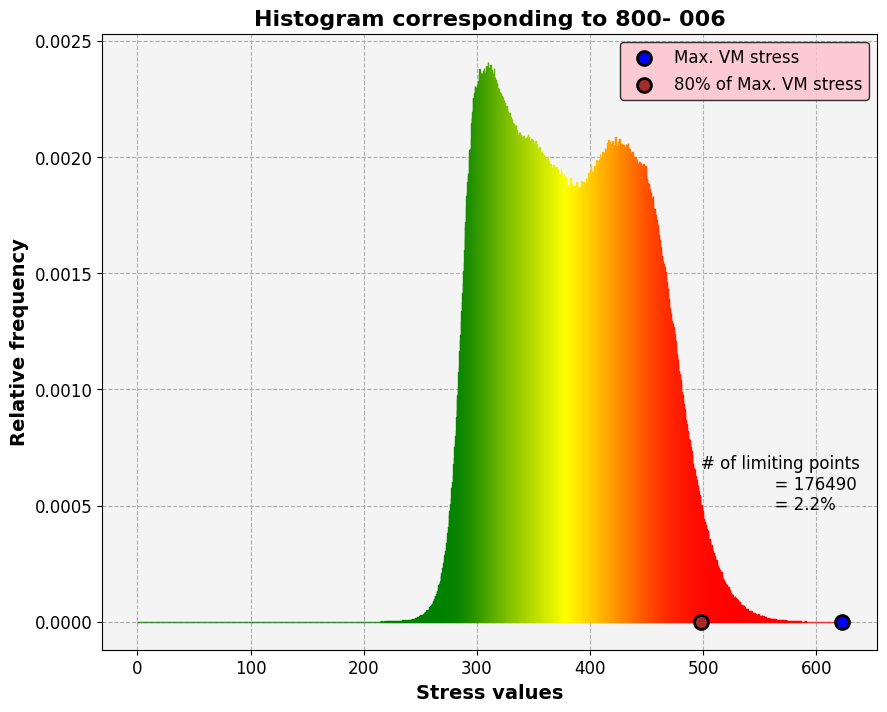

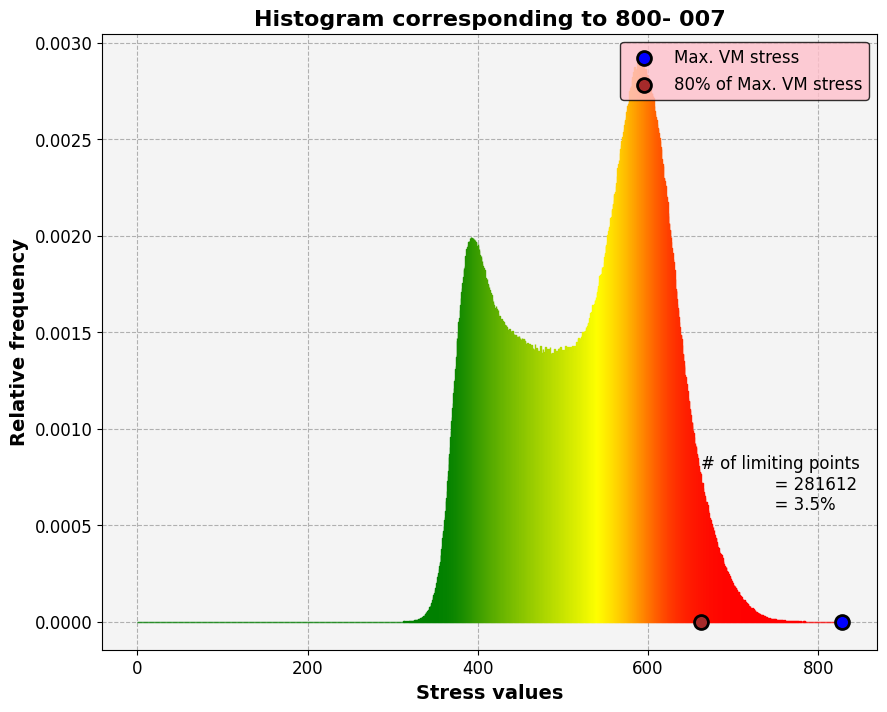

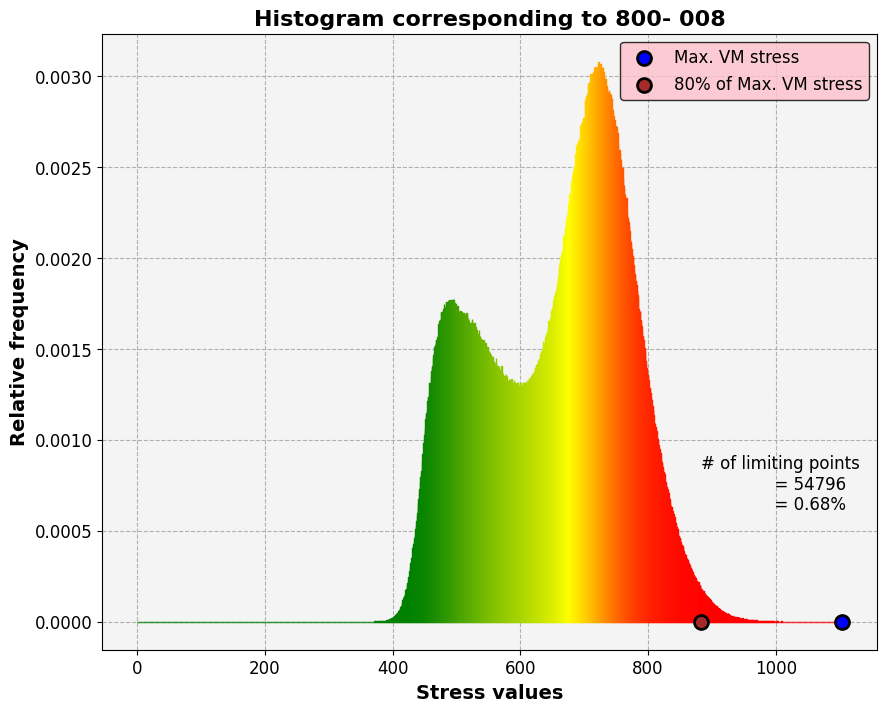

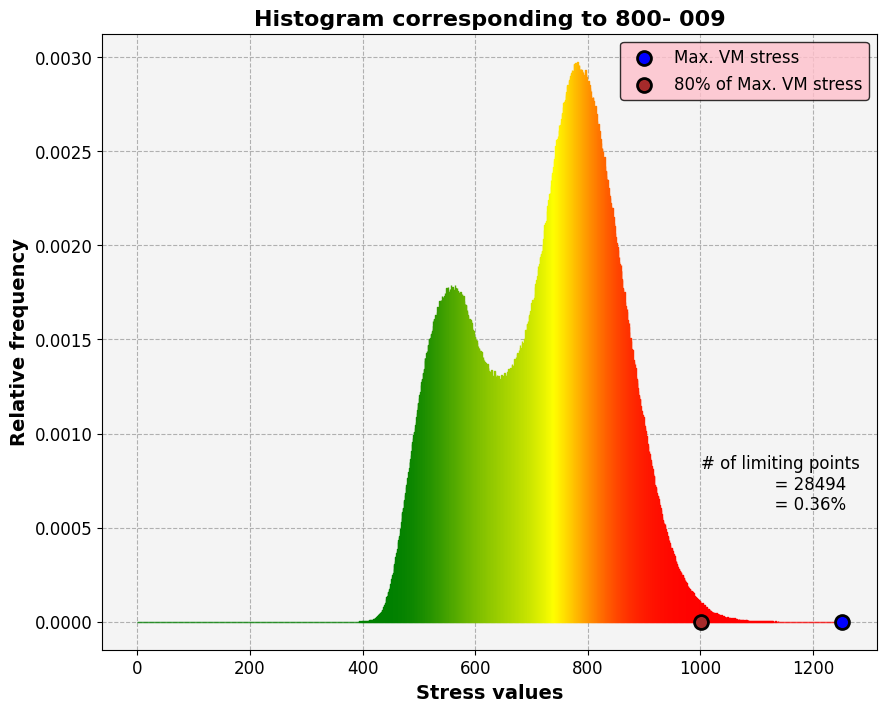

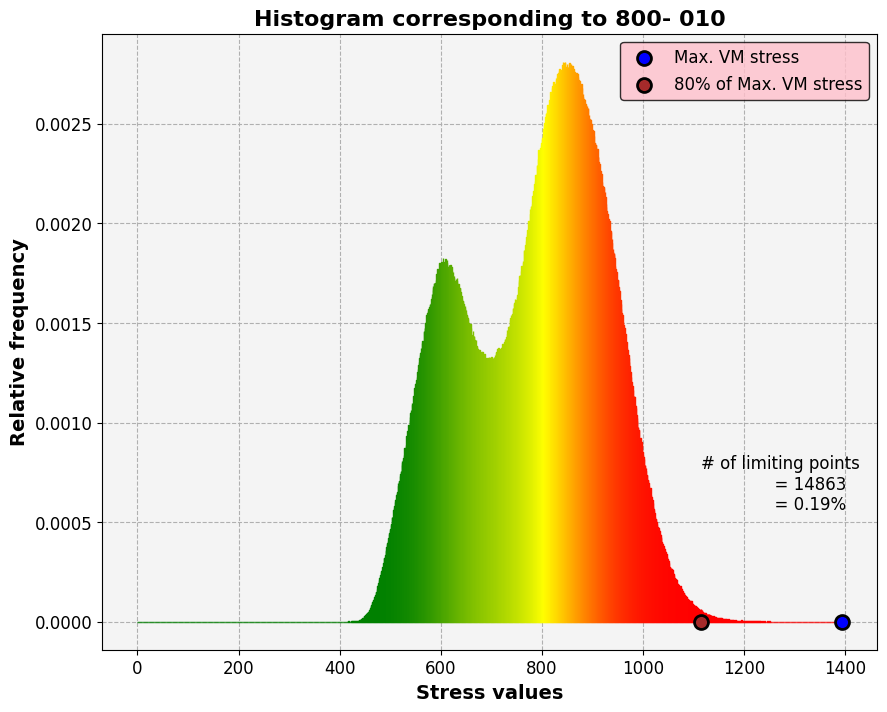

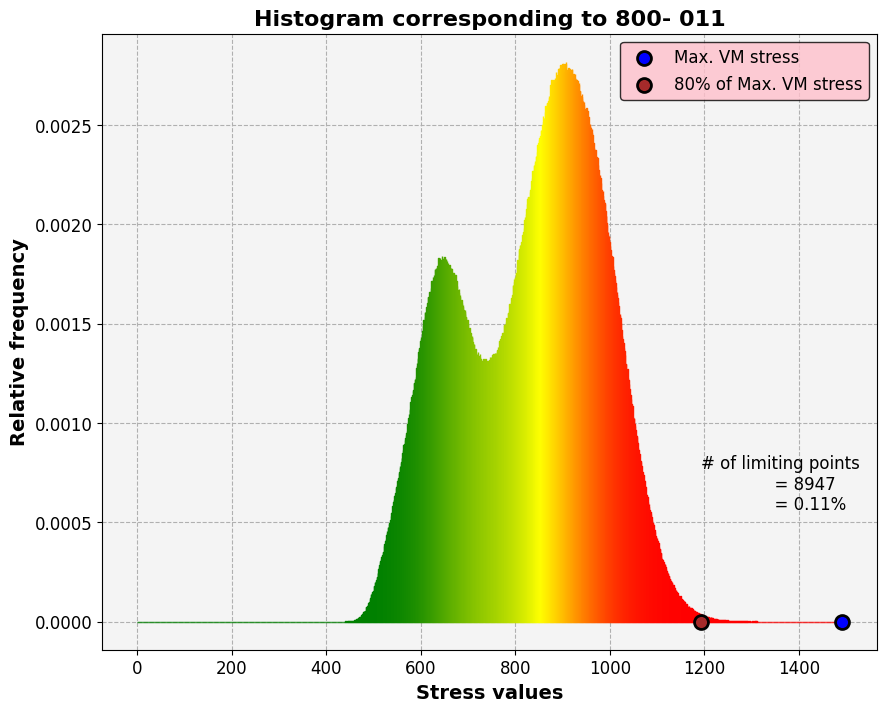

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import MinMaxScaler

for file_index in range(11):
    file_index = file_index +1

    # location of the numpy file
    file_number = f"{file_index:03}"
    npy_file_loc = f"/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/PhD(Data)/shear_data/vm_data/vm_{save_file_number}/vm_stress/vm_{save_file_number}_{file_number}.npy"
    vm_stress = np.load(npy_file_loc)

    # defining the limiting factor
    limiting_factor = 0.8

    # max and min elements of the numpy array
    ## This is important in determining the bins and constructing a uniform histogram.
    min_vmstress = np.min(np.min(vm_stress))
    max_vmstress = np.max(np.max(vm_stress))
    limiting_stress = limiting_factor * max_vmstress

    # Obtaining the Histogram
    #bin_edges_dummy = np.linspace(0,1500,1500)
    bin_edges_dummy = np.linspace(0,max_vmstress,1500)
    freq,bin_edges = np.histogram(vm_stress, bin_edges_dummy)
    cumulative_freq = np.cumsum(freq)

    rel_freq = freq/(8e6+1)
    cumulative_rel_freq = cumulative_freq/(8e6+1)

    # Finidng the indices of the limiting stress
    limiting_indices = np.delete(np.where(bin_edges>=limiting_stress)[0],-1)

    # # of elements > limiting stress
    no_of_limiting_elements = sum(freq[limiting_indices])
    percentage_of_limiting_elements = sum(rel_freq[limiting_indices])*100

    # Plotting

    ## defining color bar
    values = [0, 0.5, 1]
    color_list = ["green", "yellow", "red"]
    my_color_map= mcolors.LinearSegmentedColormap.from_list("my_color_map", list(zip(values,color_list)))

    ## Defining the color values
    scaler = MinMaxScaler()
    scaler.fit(cumulative_rel_freq.reshape(-1,1))
    norm_values_color = scaler.transform(cumulative_rel_freq.reshape(-1,1))
    c_values = my_color_map(norm_values_color)


    ## Definig the axis labels and title
    fig,axs = plt.subplots(1,1,figsize=[10,8])
    axs.set_title(f"Histogram corresponding to {save_file_number}- {file_number}", fontweight="bold", fontsize=16)
    axs.set_xlabel("Stress values", fontsize=14, fontweight="bold")
    axs.set_ylabel("Relative frequency", fontweight="bold", fontsize=14)

    # Plotting the histogram
    zip_list = list(zip(rel_freq,bin_edges[:-1],bin_edges[1:]))
    for index, (count,left,right) in enumerate(zip_list):
        axs.fill_between([left,right],0,count,color=c_values[index],zorder=2)

    ## Plotting the maximum stress and the limiting stress
    axs.scatter(max_vmstress,0, c="Blue",s=100,edgecolor="k",linewidths=2,zorder=3,label="Max. VM stress")
    axs.scatter(limiting_stress,0, c="brown",s=100,edgecolor="k",linewidths=2,zorder=3, label= "80% of Max. VM stress")

    ## Adding text to plot
    axs.text(limiting_stress,0.2*max(rel_freq),
             f"# of limiting points \n \
             = {no_of_limiting_elements}\n \
             = {percentage_of_limiting_elements:.2}%",ha = "left",fontsize=12)

    ## Defining the legend and aesthetics
    axs.legend(loc="best",fontsize=12,facecolor="pink",edgecolor="k")
    axs.set_facecolor("#f4f4f4")
    axs.grid(linestyle="--", zorder=1)
    axs.tick_params(labelsize=12)
    
    ## Saving the plot
    file_name = f"{file_number}.pdf"
    output_file_path = os.path.join(output_folder,file_name)
    fig.savefig(output_file_path)
    